In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%config IPCompleter.greedy=True

# 1. Carga de archivos

In [188]:
p1g=pd.read_csv('Datos/Plant_1_Generation_Data.csv',thousands=',')
p1g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.00,0.00,0.00,"6,259,559.00"
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.00,0.00,0.00,"6,183,645.00"
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.00,0.00,0.00,"6,987,759.00"
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.00,0.00,0.00,"7,602,960.00"
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.00,0.00,0.00,"7,158,964.00"
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.00,0.00,"5,967.00","7,287,002.00"
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.00,0.00,"5,147.62","7,028,601.00"
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.00,0.00,"5,819.00","7,251,204.00"
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.00,0.00,"5,817.00","6,583,369.00"


In [202]:
p1w=pd.read_csv('Datos/Plant_1_Weather_Sensor_Data.csv',decimal='.')
p1w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.15,21.48,0.00
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.13,21.39,0.00
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.01,20.71,0.00
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.97,20.73,0.00


In [58]:
p2g=pd.read_csv('Datos/Plant_2_Generation_Data.csv')
p2g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.00,0.00,"9,425.00","2,429,011.00"
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.00,0.00,0.00,"1,215,278,736.00"
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.00,0.00,"3,075.33","2,247,719,577.00"
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.00,0.00,269.93,"1,704,250.00"
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.00,0.00,"3,177.00","19,941,526.00"
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.00,0.00,"4,157.00","520,758.00"
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.00,0.00,"3,931.00","121,131,356.00"
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.00,0.00,"4,322.00","2,427,691.00"
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.00,0.00,"4,218.00","106,896,394.00"


In [59]:
p2w=pd.read_csv('Datos/Plant_2_Weather_Sensor_Data.csv')
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


# 2. Calidad de datos

## 2.1 calidad de datos p1g

In [79]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [190]:
# cambio la variable tiempo a formato datetime

p1g['DATE_TIME']=pd.to_datetime(p1g.DATE_TIME,dayfirst=True)

In [191]:
p1g.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.00,0.00,0.00,"6,259,559.00"
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.00,0.00,0.00,"6,183,645.00"
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.00,0.00,0.00,"6,987,759.00"
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.00,0.00,0.00,"7,602,960.00"
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.00,0.00,0.00,"7,158,964.00"


In [82]:
#Confirmo que el valor de la variable plant_id sea una constante

p1g.PLANT_ID.nunique()

1

Para hacerlo más fácil, cambiaré el registro 4135001 a 'p1'.

In [192]:
p1g.PLANT_ID=p1g.PLANT_ID.replace(4135001,'p1')

In [84]:
p1g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,"6,259,559.00"
1,2020-05-15,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,"6,183,645.00"
2,2020-05-15,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,"6,987,759.00"
3,2020-05-15,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,"7,602,960.00"
4,2020-05-15,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,"7,158,964.00"


In [193]:
p1g.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,68778,2020-06-01 08:02:49.458256896,2020-05-15 00:00:00,2020-05-24 00:45:00,2020-06-01 14:30:00,2020-06-09 20:00:00,2020-06-17 23:45:00,NaN
DC_POWER,"68,778.00","3,147.43",0.00,0.00,429.00,"6,366.96","14,471.12","4,036.46"
AC_POWER,"68,778.00",307.80,0.00,0.00,41.49,623.62,"1,410.95",394.40
DAILY_YIELD,"68,778.00","3,295.97",0.00,0.00,"2,658.71","6,274.00","9,163.00","3,145.18"
TOTAL_YIELD,"68,778.00","6,978,711.76","6,183,645.00","6,512,002.54","7,146,685.00","7,268,705.91","7,846,821.00","416,271.98"


### Observación 1 
**Se puede observar que la energia generada en formato AC es 10 veces inferior a la DC. Esto resulta extraño.**

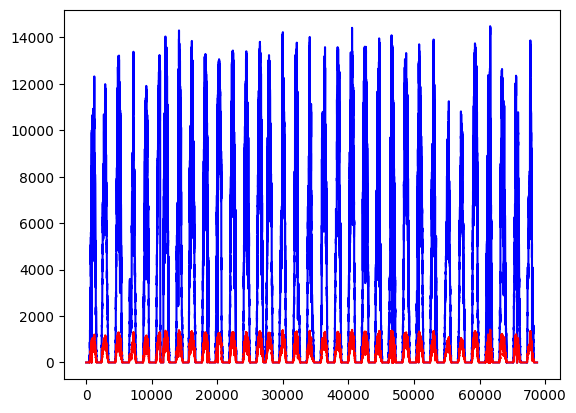

<Figure size 1600x800 with 0 Axes>

In [97]:
# Visualización
f, ax = plt.subplots()
plt.figure(figsize=(16,8))
ax.plot(p1g.DC_POWER,color='blue')
ax.plot(p1g.AC_POWER,color='red')


Voy a comprovar si almenos hay alguna relación entre las dos variables. Como por ejemplo los días de más DC generada que haya más AC.

In [99]:
p1g.AC_POWER.corr(p1g.DC_POWER)

0.9999962553331413

Se confirma que cuando DC sube AC también lo haze.

In [102]:
(p1g.DC_POWER/p1g.AC_POWER).describe()

count   36,827.00
mean        10.23
std          0.05
min          9.38
25%         10.20
50%         10.22
75%         10.25
max         10.47
dtype: float64

Parece que los Inverters están transformando solo el 10% de DC a AC, lo cual a priori es muy bajo.

In [104]:
p1g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,"6,259,559.00"
1,2020-05-15,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,"6,183,645.00"
2,2020-05-15,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,"6,987,759.00"
3,2020-05-15,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,"7,602,960.00"
4,2020-05-15,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,"7,158,964.00"


In [106]:
p1g.SOURCE_KEY.nunique()

22

Hay 22 inverters en la planta 1

In [107]:
p1g.SOURCE_KEY.value_counts() 

SOURCE_KEY
bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: count, dtype: int64

No todos tienen las mismas conversiones. 

### Observación 2
Puede haber perdida de información, parón por mantenimiento, errores...?

In [109]:
p1g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,"6,259,559.00"
1,2020-05-15,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,"6,183,645.00"
2,2020-05-15,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,"6,987,759.00"
3,2020-05-15,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,"7,602,960.00"
4,2020-05-15,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,"7,158,964.00"


In [174]:
#La variable daily yield acumula solo para inverter o el total de la planta??
p1g.groupby(['DATE_TIME','SOURCE_KEY'],as_index=False)['DAILY_YIELD'].mean()


,DATE_TIME,SOURCE_KEY,DAILY_YIELD
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.00
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.00
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.00
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.00
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.00
...,...,...,...
68773,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,"5,967.00"
68774,2020-06-17 23:45:00,wCURE6d3bPkepu2,"5,147.62"
68775,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,"5,819.00"
68776,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,"5,817.00"


**Total yield corresponde a el total generado por inverter**

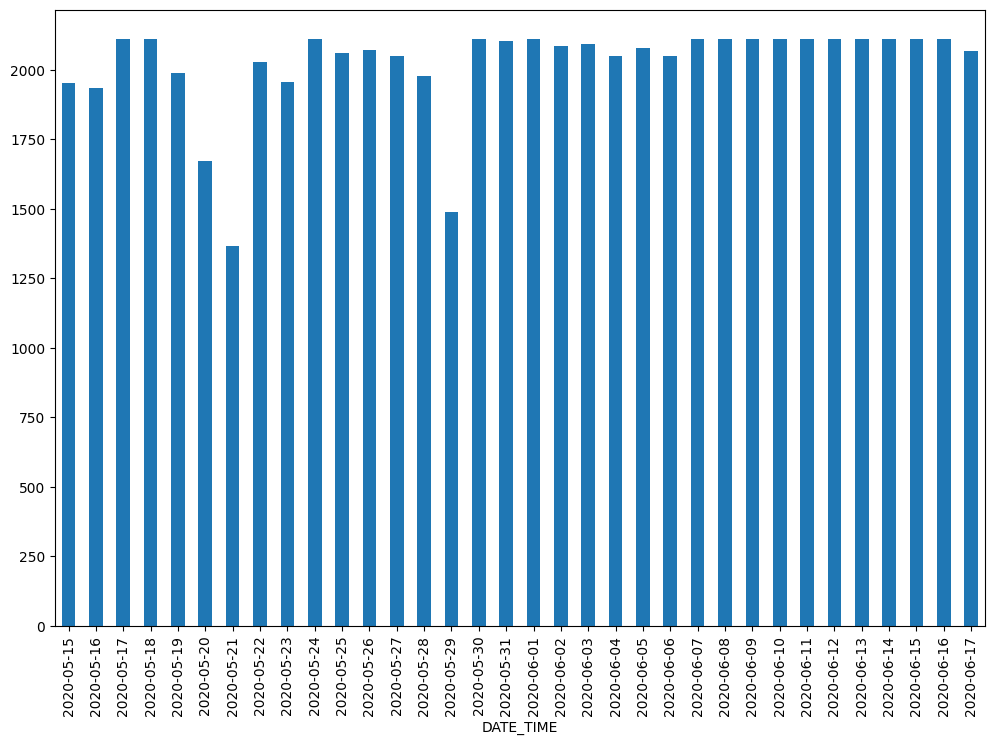

In [195]:
p1g.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize = (12,8));

Conclusiones:

    * El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
    * Tenemos datos para todos los días, no falta ninguno intermedio
    * Pero algunos días como el 21/05 o el 29/05 tienen menos mediciones
    * Por lo que no parece 100% regular

## 2.2 calidad de datos p1w

In [206]:
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   object        
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 149.3+ KB


Voy a hacer los mismos cambios hechos en p1g

In [203]:
p1w['DATE_TIME']=pd.to_datetime(p1w.DATE_TIME,dayfirst=False)

In [204]:
p1w.PLANT_ID=p1w.PLANT_ID.replace(4135001,'p1')

In [205]:
p1w.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,3182,2020-06-01 05:52:22.080452608,2020-05-15 00:00:00,2020-05-23 22:48:45,2020-06-01 09:52:30,2020-06-09 16:56:15,2020-06-17 23:45:00,NaN
AMBIENT_TEMPERATURE,"3,182.00",25.53,20.40,22.71,24.61,27.92,35.25,3.35
MODULE_TEMPERATURE,"3,182.00",31.09,18.14,21.09,24.62,41.31,65.55,12.26
IRRADIATION,"3,182.00",0.23,0.00,0.00,0.02,0.45,1.22,0.30


Parcen valores razonables

In [207]:
p1w.SOURCE_KEY.unique()

array(['HmiyD2TTLFNqkNe'], dtype=object)

Un unico sensor de temperatura y irradiación por planta

<Axes: xlabel='DATE_TIME'>

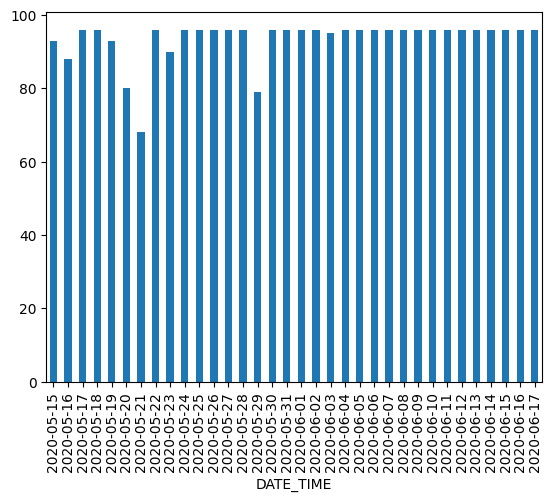

In [208]:
p1w.DATE_TIME.dt.date.value_counts().sort_index().plot.bar()

Mismas conclusiones que para p1g:
* El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
* Tenemos datos para todos los días, no falta ninguno intermedio
* Pero algunos días como el 21/05 o el 29/05 tienen menos mediciones
* Por lo que no parece 100% regular


## 2.3 Calidad de datos p2g 

In [209]:
p2g.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [210]:
p2g['DATE_TIME']=pd.to_datetime(p2g.DATE_TIME)

In [212]:
p2g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.00,0.00,"9,425.00","2,429,011.00"
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.00,0.00,0.00,"1,215,278,736.00"
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.00,0.00,"3,075.33","2,247,719,577.00"
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.00,0.00,269.93,"1,704,250.00"
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.00,0.00,"3,177.00","19,941,526.00"


In [213]:
p2g.PLANT_ID=p2g.PLANT_ID.replace(4136001,'p2')

In [214]:
p2g.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,67698,2020-06-01 10:44:33.650625024,2020-05-15 00:00:00,2020-05-23 21:00:00,2020-06-01 23:00:00,2020-06-09 23:30:00,2020-06-17 23:45:00,NaN
DC_POWER,"67,698.00",246.70,0.00,0.00,0.00,446.59,"1,420.93",370.57
AC_POWER,"67,698.00",241.28,0.00,0.00,0.00,438.22,"1,385.42",362.11
DAILY_YIELD,"67,698.00","3,294.89",0.00,272.75,"2,911.00","5,534.00","9,873.00","2,919.45"
TOTAL_YIELD,"67,698.00","658,944,788.42",0.00,"19,964,944.87","282,627,587.00","1,348,495,113.00","2,247,916,295.00","729,667,771.07"


En este caso los valores de DC y AC están mucho más cercanos entre sí.
Calculo el ratio de conversión.

In [216]:
(p2g.AC_POWER/p2g.DC_POWER).describe().T

count   32,036.00
mean         0.98
std          0.01
min          0.91
25%          0.98
50%          0.98
75%          0.98
max          1.01
dtype: float64

El % de conversión es practicamente del 100%. Estos datos son normales.
Puede ser un error de unidades la lectura de DC?

<Axes: xlabel='DATE_TIME'>

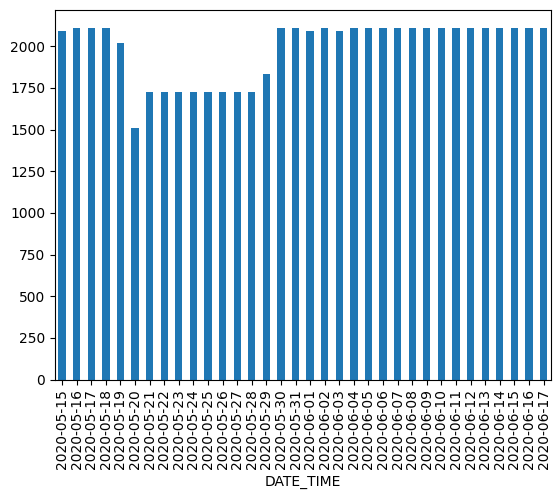

In [217]:
p2g.DATE_TIME.dt.date.value_counts().sort_index().plot.bar()

* El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
* Tenemos datos para todos los días, no falta ninguno intermedio
* Pero algunos días como el 20/05 y varios más tienen menos mediciones
* Por lo que no parece 100% regular

In [218]:
p2g.SOURCE_KEY.nunique()

22

22 sensores para la planta 2.Los mismos que para p1

## 2.4 Calidad de datos p2w

In [219]:
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [220]:
p2w['DATE_TIME']=pd.to_datetime(p2w.DATE_TIME,dayfirst=False)

In [221]:
p2w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00


In [222]:
p2w.PLANT_ID=p2w.PLANT_ID.replace(4136001,'p2')

In [223]:
p2w.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,3259,2020-06-01 00:04:35.053697536,2020-05-15 00:00:00,2020-05-23 12:07:30,2020-06-01 00:00:00,2020-06-09 12:07:30,2020-06-17 23:45:00,NaN
AMBIENT_TEMPERATURE,"3,259.00",28.07,20.94,24.60,26.98,31.06,39.18,4.06
MODULE_TEMPERATURE,"3,259.00",32.77,20.27,23.72,27.53,40.48,66.64,11.34
IRRADIATION,"3,259.00",0.23,0.00,0.00,0.02,0.44,1.10,0.31


Parcen valores normales. Todo ok.

In [224]:
p2w.SOURCE_KEY.nunique()

1

Un sensor para temperatura y irradiación en la p2. Todo ok

<Axes: xlabel='DATE_TIME'>

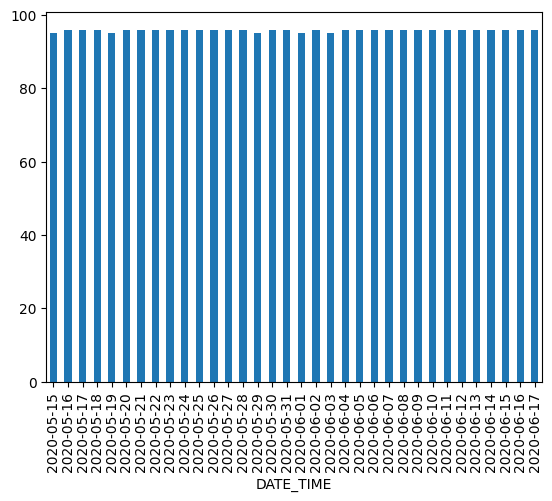

In [225]:
p2w.DATE_TIME.dt.date.value_counts().sort_index().plot.bar()

Conclusiones:

    * El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
    * Tenemos datos para todos los días, no falta ninguno intermedio
    * Pero algunos días como el 15/05 u otros tienen menos mediciones, aunque faltan mucho menos que en los otros datasets
    * Pero no parece 100% regular

### Observación 3
El numero de mediciones de los días no son iguales para todos

# 3. Unificar datasets 

## 3.1 Unión de los datasets de mediciones ambientales

In [226]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  object        
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.7+ MB


In [227]:
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  object        
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.6+ MB


In [229]:
dfg=pd.concat([p1g,p2g])
dfg

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,"6,259,559.00"
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,"6,183,645.00"
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,"6,987,759.00"
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,"7,602,960.00"
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,"7,158,964.00"
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,"4,157.00","520,758.00"
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,"3,931.00","121,131,356.00"
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,"4,322.00","2,427,691.00"
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,"4,218.00","106,896,394.00"


In [233]:
#Renombrar variables
var=['fecha','planta','inverter_id','kw_dc','kw_ac','kw_dia','kw_total']
dfg.columns=var
dfg

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,"6,259,559.00"
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,"6,183,645.00"
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,"6,987,759.00"
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,"7,602,960.00"
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,"7,158,964.00"
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,"4,157.00","520,758.00"
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,"3,931.00","121,131,356.00"
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,"4,322.00","2,427,691.00"
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,"4,218.00","106,896,394.00"


## 3.2Unión de los datasets de mediciones ambientales

In [234]:
dfw=pd.concat([p1w,p2w])
dfw

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


In [235]:
dfw.columns = ['fecha','planta','sensor_id','t_ambiente','t_modulo','irradiacion']
dfw

,fecha,planta,sensor_id,t_ambiente,t_modulo,irradiacion
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


In [236]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136476 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   fecha        136476 non-null  datetime64[ns]
 1   planta       136476 non-null  object        
 2   inverter_id  136476 non-null  object        
 3   kw_dc        136476 non-null  float64       
 4   kw_ac        136476 non-null  float64       
 5   kw_dia       136476 non-null  float64       
 6   kw_total     136476 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 12.4+ MB


In [237]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6441 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fecha        6441 non-null   datetime64[ns]
 1   planta       6441 non-null   object        
 2   sensor_id    6441 non-null   object        
 3   t_ambiente   6441 non-null   float64       
 4   t_modulo     6441 non-null   float64       
 5   irradiacion  6441 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 352.2+ KB


In [238]:
df=pd.merge(left=dfg,right=dfw,how='left',on=['fecha','planta'])
df

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,"6,259,559.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,"6,183,645.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,"6,987,759.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,"7,602,960.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,"7,158,964.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,"4,157.00","520,758.00",iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136472,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,"3,931.00","121,131,356.00",iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136473,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,"4,322.00","2,427,691.00",iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136474,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,"4,218.00","106,896,394.00",iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [241]:
df.isna().sum()

fecha          0
planta         0
inverter_id    0
kw_dc          0
kw_ac          0
kw_dia         0
kw_total       0
sensor_id      4
t_ambiente     4
t_modulo       4
irradiacion    4
dtype: int64

In [247]:
df[df.sensor_id.isna()]

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
38544,2020-06-03 14:00:00,p1,1IF53ai7Xc0U56Y,"7,003.00",685.80,"5,601.00","6,330,385.00",NaN,NaN,NaN,NaN
38545,2020-06-03 14:00:00,p1,adLQvlD726eNBSB,"7,204.00",705.40,"5,685.00","6,419,961.00",NaN,NaN,NaN,NaN
38546,2020-06-03 14:00:00,p1,wCURE6d3bPkepu2,"7,545.00",738.70,"5,579.00","6,928,448.00",NaN,NaN,NaN,NaN
38547,2020-06-03 14:00:00,p1,z9Y9gH1T5YWrNuG,"7,946.00",777.80,"5,541.00","7,152,815.00",NaN,NaN,NaN,NaN


Se trata del día 3 de Junio a las 14:00, que por algún motivo no tiene datos de temperatura pero solo para 4 inverters de la planta 1.

Vamos a buscar en el dataset de temperatura si existe ese datetime.


In [248]:
dfw[dfw.fecha.between('2020-06-03 13:30:00', '2020-06-03 14:30:00')]

,fecha,planta,sensor_id,t_ambiente,t_modulo,irradiacion
1797,2020-06-03 13:30:00,p1,HmiyD2TTLFNqkNe,28.56,48.78,0.75
1798,2020-06-03 13:45:00,p1,HmiyD2TTLFNqkNe,27.86,46.63,0.62
1799,2020-06-03 14:15:00,p1,HmiyD2TTLFNqkNe,28.36,50.63,0.72
1800,2020-06-03 14:30:00,p1,HmiyD2TTLFNqkNe,28.31,47.38,0.67
1874,2020-06-03 13:30:00,p2,iq8k7ZNt4Mwm3w0,28.60,37.68,0.41
1875,2020-06-03 13:45:00,p2,iq8k7ZNt4Mwm3w0,28.75,36.35,0.35
1876,2020-06-03 14:15:00,p2,iq8k7ZNt4Mwm3w0,30.45,45.63,0.76
1877,2020-06-03 14:30:00,p2,iq8k7ZNt4Mwm3w0,29.64,40.40,0.44


No hay lecturas de temperatura ni irradiación para esta hora.
Como es solo un dia y hora en concreto que tiene errores vamos a eliminar esos nulos.

In [249]:
df.dropna(inplace = True)
df

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,"6,259,559.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,"6,183,645.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,"6,987,759.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,"7,602,960.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,"7,158,964.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,"4,157.00","520,758.00",iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136472,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,"3,931.00","121,131,356.00",iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136473,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,"4,322.00","2,427,691.00",iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136474,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,"4,218.00","106,896,394.00",iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [250]:
df.set_index('fecha', inplace = True)
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
fecha,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,"6,259,559.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,"6,183,645.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,"6,987,759.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,"7,602,960.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,"7,158,964.00",HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,"4,157.00","520,758.00",iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,"3,931.00","121,131,356.00",iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,"4,322.00","2,427,691.00",iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [251]:
df.to_pickle('df.pickle')